In [ ]:
import pandas as pd

# 데이터 불러오기

In [ ]:
subway_201510_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201510.csv", encoding = 'cp949')
subway_201610_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201610.csv", encoding = 'cp949')
subway_201710_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201710.csv", encoding = 'cp949')
subway_201810_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201810.csv", encoding = 'cp949')
subway_201910_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201910.csv", encoding = 'cp949')

In [ ]:
subway_202010_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202010.csv", encoding = 'UTF-8')
subway_202110_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202110.csv", encoding = 'UTF-8')
subway_202210_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202210.csv", encoding = 'UTF-8')

# 데이터프레임 전처리

한칸씩 밀리는 문제 있는 데이터프레임 처리

In [ ]:
subway_202010_df = subway_202010_df.loc[:,'노선명':'등록일자']
subway_202110_df = subway_202110_df.loc[:,'노선명':'등록일자']
subway_202210_df = subway_202210_df.loc[:,'노선명':'등록일자']

In [ ]:
pd.DataFrame(subway_202010_df).head(2)

,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20201001,2호선,시청,2118,1605
1,20201001,1호선,청량리(서울시립대입구),6567,6637


In [ ]:
subway_202010_df.rename(columns = {'노선명':'사용일자','역명':'노선명','승차총승객수':'역명','하차총승객수':'승차총승객수','등록일자':'하차총승객수'},inplace = True)
subway_202110_df.rename(columns = {'노선명':'사용일자','역명':'노선명','승차총승객수':'역명','하차총승객수':'승차총승객수','등록일자':'하차총승객수'},inplace = True)
subway_202210_df.rename(columns = {'노선명':'사용일자','역명':'노선명','승차총승객수':'역명','하차총승객수':'승차총승객수','등록일자':'하차총승객수'},inplace = True)

In [ ]:
dataframes = [subway_201510_df,subway_201610_df,subway_201710_df,subway_201810_df,subway_201910_df,subway_202010_df,subway_202110_df,subway_202210_df]

이태원역만 포함된 데이터 프레임 만들기
concat() 함수로 이태원 데이터 프레임 만들기
groupby()를 이용해 사용일자의 오른쪽 네 글자가 같은 것을 기준으로 평균치 구하기기

In [ ]:
df_10 = pd.concat(dataframes, axis = 0)
pd.DataFrame(df_10)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20151001,경인선,중동,11414.0,10683.0,20151217.0
1,20151001,경인선,온수,8548.0,8035.0,20151217.0
2,20151001,경인선,도원,4430.0,4544.0,20151217.0
3,20151001,경인선,간석,7341.0,7088.0,20151217.0
4,20151001,경인선,부개,11951.0,11093.0,20151217.0
...,...,...,...,...,...,...
18780,20221031,6호선,버티고개,2366.0,2239.0,NaN
18781,20221031,6호선,약수,3778.0,3751.0,NaN
18782,20221031,6호선,청구,3842.0,4067.0,NaN
18783,20221031,6호선,신당,8136.0,8814.0,NaN


In [ ]:
df_10.rename(columns = {'사용일자':'UsedDate','노선명':'Line','역명':'Station','승차총승객수':'Board','하차총승객수':'Alight','등록일자':'Registration'}, inplace = True)
df_10['Sum'] = df_10['Board']+df_10['Alight']
df_10['Date'] = df_10['UsedDate']%10000

pd.DataFrame(df_10)

,UsedDate,Line,Station,Board,Alight,Registration,Sum,Date
0,20151001,경인선,중동,11414.0,10683.0,20151217.0,22097.0,1001
1,20151001,경인선,온수,8548.0,8035.0,20151217.0,16583.0,1001
2,20151001,경인선,도원,4430.0,4544.0,20151217.0,8974.0,1001
3,20151001,경인선,간석,7341.0,7088.0,20151217.0,14429.0,1001
4,20151001,경인선,부개,11951.0,11093.0,20151217.0,23044.0,1001
...,...,...,...,...,...,...,...,...
18780,20221031,6호선,버티고개,2366.0,2239.0,NaN,4605.0,1031
18781,20221031,6호선,약수,3778.0,3751.0,NaN,7529.0,1031
18782,20221031,6호선,청구,3842.0,4067.0,NaN,7909.0,1031
18783,20221031,6호선,신당,8136.0,8814.0,NaN,16950.0,1031


# 역별 데이터프레임 구성

In [ ]:
df_10_itw = df_10[df_10['Station']=='이태원']
df_10_itw.sort_values(by = 'Sum',ascending = False).head(10)

,UsedDate,Line,Station,Board,Alight,Registration,Sum,Date
17166,20221029,6호선,이태원,48459.0,81362.0,NaN,129821.0,1029
16570,20151031,6호선,이태원,37666.0,71712.0,20151217.0,109378.0,1031
16103,20171028,6호선,이태원,39662.0,64310.0,20171031.0,103972.0,1028
15665,20181027,6호선,이태원,40276.0,61902.0,20181030.0,102178.0,1027
7558,20181013,6호선,이태원,43183.0,54732.0,20181016.0,97915.0,1013
7792,20171014,6호선,이태원,42625.0,54618.0,20171017.0,97243.0,1014
15215,20191026,6호선,이태원,38619.0,57844.0,20191029.0,96463.0,1026
9015,20151017,6호선,이태원,40597.0,48892.0,20151217.0,89489.0,1017
8113,20161015,6호선,이태원,39703.0,48687.0,20161023.0,88390.0,1015
6949,20191012,6호선,이태원,38648.0,48537.0,20191015.0,87185.0,1012


In [ ]:
df_10_itw.groupby('Date').mean().sort_values(by = 'Sum',ascending = False, inplace = False).head(5)

,UsedDate,Board,Alight,Registration,Sum
Date,,,,,
1031,20186031.0,23735.000,32468.500,20171126.8,56203.500
1029,20186029.0,22695.750,28395.375,20171125.2,51091.125
1028,20186028.0,20568.000,25079.250,20171083.0,45647.250
1015,20186015.0,20845.125,23392.375,20171058.8,44237.500
1027,20186027.0,19324.500,22905.500,20171082.2,42230.000


In [ ]:
df_10_31 = df_10[df_10['Date']==1031]
df_10_31.sort_values(by = 'Sum',ascending = False).head(5)

,UsedDate,Line,Station,Board,Alight,Registration,Sum,Date
17688,20181031,2호선,강남,110611.0,110664.0,20181103.0,221275.0,1031
17787,20191031,2호선,강남,108061.0,110902.0,20191103.0,218963.0,1031
16860,20151031,2호선,홍대입구,96434.0,121168.0,20151217.0,217602.0,1031
17667,20171031,2호선,강남,105742.0,104916.0,20171103.0,210658.0,1031
17209,20161031,2호선,강남,99256.0,99104.0,20161108.0,198360.0,1031


In [ ]:
df_10_31.groupby('Station').mean().sort_values(by = 'Sum',ascending = False, inplace = False).head(5)

,UsedDate,Board,Alight,Registration,Sum,Date
Station,,,,,,
강남,2.018603e+07,86248.125000,87333.625000,20171126.8,173581.750000,1031.0
강변,2.015103e+07,60977.000000,61505.000000,20151217.0,122482.000000,1031.0
구로디지털단지,2.018603e+07,58410.750000,58101.750000,20171126.8,116512.500000,1031.0
신림,2.018992e+07,59072.444444,57145.666667,20171126.8,116218.111111,1031.0
잠실,2.015103e+07,56342.000000,51242.000000,20151217.0,107584.000000,1031.0


10/31만 뽑아봤는데 실질적으로 의미 X

# T-test (양측검정)

할로윈 당일, 할로윈 포함 주 금요일이나 일요일 토요일에 가장 많이 몰리는 것 확인

In [ ]:
from scipy import stats

In [ ]:
df_itw_isHallo = df_10_itw[df_10_itw['Date']==1031]
pd.DataFrame(df_itw_isHallo['Sum'])


,Sum
16570,109378.0
17348,40335.0
17812,52782.0
17676,64771.0
18195,83568.0
18356,30122.0
18388,45136.0
18778,23536.0


In [ ]:
itw = df_10_itw
HalloSats = [itw[itw['UsedDate']==20151031], itw[itw['UsedDate']==20161029],itw[itw['UsedDate']==20171028], itw[itw['UsedDate']==20181027], itw[itw['UsedDate']==20191026],itw[itw['UsedDate']==20201031],itw[itw['UsedDate']==20211030],itw[itw['UsedDate']==20221029]]

df_itw_HalloSats = pd.concat(HalloSats, axis = 0)
pd.DataFrame(df_itw_HalloSats['Sum'])

,Sum
16570,109378.0
15955,83765.0
16103,103972.0
15665,102178.0
15215,96463.0
18356,30122.0
17773,59220.0
17166,129821.0


In [ ]:
HalloSuns = [itw[itw['UsedDate']==20161030],itw[itw['UsedDate']==20171029], itw[itw['UsedDate']==20181028], itw[itw['UsedDate']==20191027],itw[itw['UsedDate']==20211031],itw[itw['UsedDate']==20221030]]

df_itw_HalloSuns = pd.concat(HalloSuns, axis = 0)
pd.DataFrame(df_itw_HalloSuns['Sum'])

HalloFris = [itw[itw['UsedDate']==20151030], itw[itw['UsedDate']==20161028],itw[itw['UsedDate']==20171027], itw[itw['UsedDate']==20181026], itw[itw['UsedDate']==20191025],itw[itw['UsedDate']==20201030],itw[itw['UsedDate']==20211029],itw[itw['UsedDate']==20221028]]

df_itw_HalloFris = pd.concat(HalloFris, axis = 0)
pd.DataFrame(df_itw_HalloFris['Sum'])

,Sum
16086,53674.0
15797,51280.0
15086,58457.0
15011,54487.0
14625,57254.0
17571,23962.0
17097,30341.0
16590,59783.0


In [ ]:
print(df_itw_isHallo['Sum'].mean())
print(df_itw_HalloFris['Sum'].mean())
print(df_itw_HalloSats['Sum'].mean())
print(df_itw_HalloSuns['Sum'].mean())
print(df_10_itw['Sum'].mean())

56203.5
48654.75
89364.875
45071.666666666664
34987.83064516129


이태원에는 할로윈이 포함된 토요일에 사람이 통계적으로 유의미하게 많이 몰리는 것으로 드러남

In [ ]:
con1 = itw['UsedDate']==20151031
con2 = itw['UsedDate']==20161029
con3 = itw['UsedDate']==20171028
con4 = itw['UsedDate']==20181027
con5 = itw['UsedDate']==20191026
con6 = itw['UsedDate']==20201031
con7 = itw['UsedDate']==20211030
con8 = itw['UsedDate']==20221029

df_itw_HalloSats_Y = itw.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_itw_HalloSats_N = itw.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Sum']

In [ ]:
print(df_itw_HalloSats_Y.mean())
print(df_itw_HalloSats_N.mean())

89364.875
33175.2625


In [ ]:
t_stat, p_value = stats.ttest_ind(df_itw_HalloSats_Y, df_itw_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 9.809361719803801, p-value : 2.1982369067894003e-19


그에 반해 할로윈에 사람이 가장 많았던 상위 5개의 역은 강변, 구로디지털단지 제외 통계적으로 유의미하게 차이 없는 것 확인

In [ ]:
df_10_gn = df_10[df_10['Station']=='강남']
gn = df_10_gn

con1 = gn['UsedDate']==20151031
con2 = gn['UsedDate']==20161029
con3 = gn['UsedDate']==20171028
con4 = gn['UsedDate']==20181027
con5 = gn['UsedDate']==20191026
con6 = gn['UsedDate']==20201031
con7 = gn['UsedDate']==20211030
con8 = gn['UsedDate']==20221029

df_gn_HalloSats_Y = gn.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_gn_HalloSats_N = gn.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Sum']

t_stat, p_value = stats.ttest_ind(df_gn_HalloSats_Y, df_gn_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))
print(df_gn_HalloSats_Y.mean())
print(df_gn_HalloSats_N.mean())

t-statistics : -0.15033213811854, p-value : 0.8806257669035565
165940.75
168835.05416666667


강변은 차이가 통계적으로 유의미한 것으로 나오지만 이태원만큼 엄청난 정도는 아님

In [ ]:
df_10_gb = pd.concat([df_10[df_10['Station']=='강변'], df_10[df_10['Station']=='강변(동서울터미널)']],axis = 0)
gb = df_10_gb

con1 = gb['UsedDate']==20151031
con2 = gb['UsedDate']==20161029
con3 = gb['UsedDate']==20171028
con4 = gb['UsedDate']==20181027
con5 = gb['UsedDate']==20191026
con6 = gb['UsedDate']==20201031
con7 = gb['UsedDate']==20211030
con8 = gb['UsedDate']==20221029


df_gb_HalloSats_Y = gb.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_gb_HalloSats_N = gb.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Sum']

t_stat, p_value = stats.ttest_ind(df_gb_HalloSats_Y, df_gb_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 2.0869694541965256, p-value : 0.03792058678124269


단순한 추정으로는 그냥 주말이라 터미널에 사람이 몰려서 그런듯(추가 분석 필요!!)

In [ ]:
print(df_gb_HalloSats_Y.mean())
print(df_gb_HalloSats_N.mean())

98243.625
81338.93333333333


구로디지털단지는 회사가 많은 지역이라 그런지 주말에 오히려 통행인구수가 적은 것 확인(강변 case와 같이 추가분석 필요)

In [ ]:
df_10_gd = df_10[df_10['Station']=='구로디지털단지']
gd = df_10_gd

con1 = gd['UsedDate']==20151031
con2 = gd['UsedDate']==20161029
con3 = gd['UsedDate']==20171028
con4 = gd['UsedDate']==20181027
con5 = gd['UsedDate']==20191026
con6 = gd['UsedDate']==20201031
con7 = gd['UsedDate']==20211030
con8 = gd['UsedDate']==20221029


df_gd_HalloSats_Y = gd.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_gd_HalloSats_N = gd.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Sum']

t_stat, p_value = stats.ttest_ind(df_gd_HalloSats_Y, df_gd_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : -1.970418133780219, p-value : 0.049911897131078437


In [ ]:
df_10_sl = df_10[df_10['Station']=='신림'] #2호선 + 신림선 개통으로 데이터 양 살짝 더 많음음
sl = df_10_sl

con1 = sl['UsedDate']==20151031
con2 = sl['UsedDate']==20161029
con3 = sl['UsedDate']==20171028
con4 = sl['UsedDate']==20181027
con5 = sl['UsedDate']==20191026
con6 = sl['UsedDate']==20201031
con7 = sl['UsedDate']==20211030
con8 = sl['UsedDate']==20221029

df_sl_HalloSats_Y = sl.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_sl_HalloSats_N = sl.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Sum']

t_stat, p_value = stats.ttest_ind(df_sl_HalloSats_Y, df_sl_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : -0.12819929180785655, p-value : 0.8980842850570425


In [ ]:
df_10_js = pd.concat([df_10[df_10['Station']=='잠실'], df_10[df_10['Station']=='잠실(송파구청)']],axis = 0) #환승역이라 2호선 8호선 합쳐져 데이터 양 2배배
js = df_10_js

con1 = js['UsedDate']==20151031
con2 = js['UsedDate']==20161029
con3 = js['UsedDate']==20171028
con4 = js['UsedDate']==20181027
con5 = js['UsedDate']==20191026
con6 = js['UsedDate']==20201031
con7 = js['UsedDate']==20211030
con8 = js['UsedDate']==20221029

df_js_HalloSats_Y = js.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_js_HalloSats_N = js.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Sum']

t_stat, p_value = stats.ttest_ind(df_js_HalloSats_Y, df_js_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 0.9574616270890278, p-value : 0.3388026408968068


# T-test 단측검정

# 시각화

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = df_10_itw.groupby('Date').mean()
df2 = df_10_gn.groupby('Date').mean()
df3 = df_10_gb.groupby('Date').mean()
df4 = df_10_gd.groupby('Date').mean()
df5 = df_10_sl.groupby('Date').mean()
df6 = df_10_js.groupby('Date').mean()
df1

,UsedDate,Board,Alight,Registration,Sum
Date,,,,,
1001,20186001.0,14270.250,16184.125,20171047.6,30454.375
1002,20186002.0,14421.625,17332.625,20171048.4,31754.250
1003,20186003.0,14405.875,15310.500,20171049.2,29716.375
1004,20186004.0,12559.875,13908.500,20171050.0,26468.375
1005,20186005.0,13949.125,16616.875,20171050.8,30566.000
1006,20186006.0,14568.250,16410.625,20171051.6,30978.875
1007,20186007.0,15080.625,17244.250,20171052.4,32324.875
1008,20186008.0,16367.000,20512.375,20171053.2,36879.375
1009,20186009.0,16035.875,16235.375,20171054.0,32271.250


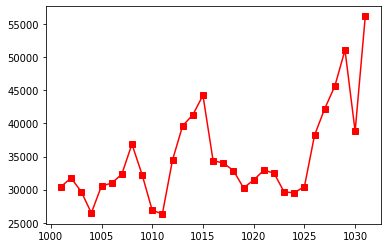

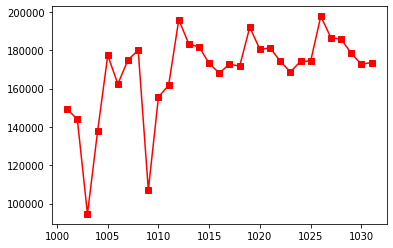

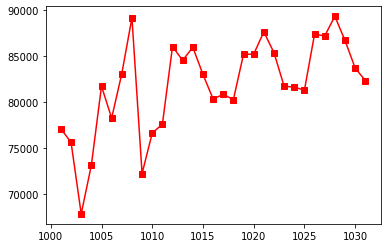

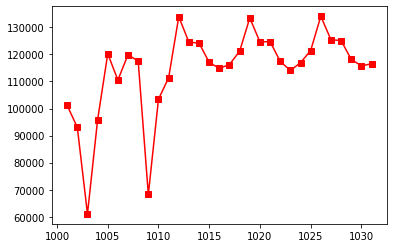

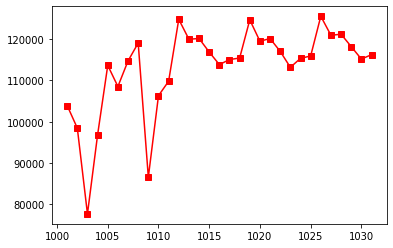

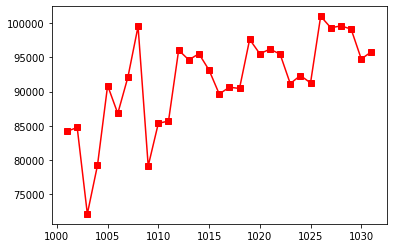

In [ ]:
dfs = [df1,df2,df3,df4,df5,df6]
for i in dfs:
  plt.plot(i.index, i.Sum, marker = 's', color = 'red')
  plt.show()

# 할로윈 포함 토요일과 할로윈 미포함 토요일 비교

## 요일 칼럼 추가

In [ ]:
import datetime
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
date = []
for i in range(0,len(pd.DataFrame(df_10['UsedDate']))):
  a = pd.DataFrame(df_10['UsedDate']).iat[i,0]
  date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])

# 요일 컬럼 집어넣기
df_10.insert(0,'요일',date)


In [ ]:
df_10 

,요일,UsedDate,Line,Station,Board,Alight,Registration,Sum,Date
0,Thu,20151001,경인선,중동,11414.0,10683.0,20151217.0,22097.0,1001
1,Thu,20151001,경인선,온수,8548.0,8035.0,20151217.0,16583.0,1001
2,Thu,20151001,경인선,도원,4430.0,4544.0,20151217.0,8974.0,1001
3,Thu,20151001,경인선,간석,7341.0,7088.0,20151217.0,14429.0,1001
4,Thu,20151001,경인선,부개,11951.0,11093.0,20151217.0,23044.0,1001
...,...,...,...,...,...,...,...,...,...
18780,Mon,20221031,6호선,버티고개,2366.0,2239.0,NaN,4605.0,1031
18781,Mon,20221031,6호선,약수,3778.0,3751.0,NaN,7529.0,1031
18782,Mon,20221031,6호선,청구,3842.0,4067.0,NaN,7909.0,1031
18783,Mon,20221031,6호선,신당,8136.0,8814.0,NaN,16950.0,1031


In [ ]:
df_10.rename(columns = {'요일':'Weekday'},inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df_10_itw = df_10[df_10['Station']=='이태원']
df_10_gn = df_10[df_10['Station']=='강남']
df_10_gb = pd.concat([df_10[df_10['Station']=='강변'], df_10[df_10['Station']=='강변(동서울터미널)']],axis = 0)
df_10_gd = df_10[df_10['Station']=='구로디지털단지']
df_10_sl = df_10[df_10['Station']=='신림']
df_10_js = pd.concat([df_10[df_10['Station']=='잠실'], df_10[df_10['Station']=='잠실(송파구청)']],axis = 0) #환승역이라 2호선 8호선 합쳐져 데이터 양 2배배


## 각 역별 토요일만 추출

In [ ]:
df_10_itw_Sats = df_10_itw[df_10_itw['Weekday']=='Sat']
df_10_gn_Sats = df_10_gn[df_10_gn['Weekday']=='Sat']
df_10_gb_Sats = df_10_gb[df_10_gb['Weekday']=='Sat']
df_10_gd_Sats = df_10_gd[df_10_gd['Weekday']=='Sat']
df_10_sl_Sats = df_10_sl[df_10_sl['Weekday']=='Sat'].groupby('UsedDate').sum()
df_10_js_Sats = df_10_js[df_10_js['Weekday']=='Sat'].groupby('UsedDate').sum()

In [ ]:
itw = df_10_itw_Sats.reset_index()
gn = df_10_gn_Sats.reset_index() 
gb = df_10_gb_Sats.reset_index()
gd = df_10_gd_Sats.reset_index() 
sl = df_10_sl_Sats.reset_index() 
js = df_10_js_Sats.reset_index()

## 시각화

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

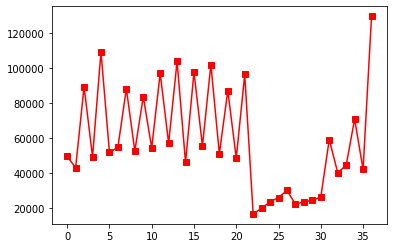

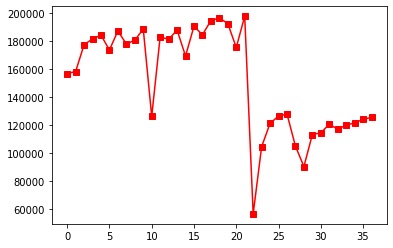

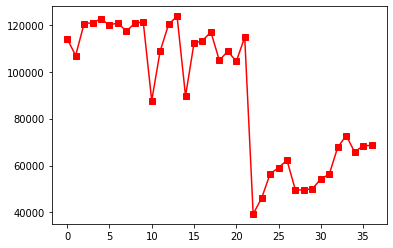

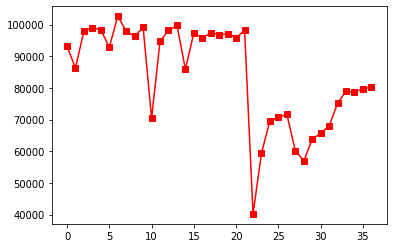

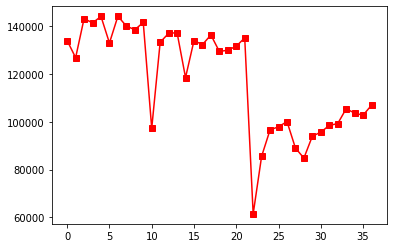

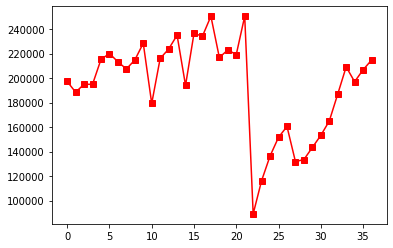

In [ ]:
dfs = [itw,gn,gb,gd,sl,js]
for i in dfs:
  plt.plot(i.index, i.Sum, marker = 's', color = 'red')
  plt.show()

## 단측검정

In [ ]:
from scipy import stats

In [ ]:
con1 = itw['UsedDate']==20151031
con2 = itw['UsedDate']==20161029
con3 = itw['UsedDate']==20171028
con4 = itw['UsedDate']==20181027
con5 = itw['UsedDate']==20191026
con6 = itw['UsedDate']==20201031
con7 = itw['UsedDate']==20211030
con8 = itw['UsedDate']==20221029

df_itw_Sats_H = itw.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_itw_Sats_nH = itw.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Sum']

In [ ]:
t_stat, p_value = stats.ttest_ind(df_itw_Sats_H, df_itw_Sats_nH, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 3.8584456829722025, p-value : 0.00023461339063932446


In [ ]:
print(df_itw_Sats_H.mean())
print(df_itw_Sats_nH.mean())

89364.875
50145.24137931035


In [ ]:
con1 = gn['UsedDate']==20151031
con2 = gn['UsedDate']==20161029
con3 = gn['UsedDate']==20171028
con4 = gn['UsedDate']==20181027
con5 = gn['UsedDate']==20191026
con6 = gn['UsedDate']==20201031
con7 = gn['UsedDate']==20211030
con8 = gn['UsedDate']==20221029

df_gn_Sats_H = gn.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_gn_Sats_nH = gn.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Sum']

In [ ]:
t_stat, p_value = stats.ttest_ind(df_gn_Sats_H, df_gn_Sats_nH, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 1.1716994972431813, p-value : 0.12461619470903676


In [ ]:
print(df_gn_Sats_H.mean())
print(df_gn_Sats_nH.mean())

165940.75
148626.62068965516


In [ ]:
con1 = gd['UsedDate']==20151031
con2 = gd['UsedDate']==20161029
con3 = gd['UsedDate']==20171028
con4 = gd['UsedDate']==20181027
con5 = gd['UsedDate']==20191026
con6 = gd['UsedDate']==20201031
con7 = gd['UsedDate']==20211030
con8 = gd['UsedDate']==20221029

df_gd_Sats_H = gd.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_gd_Sats_nH = gd.loc[~con1 & ~con2 & ~con3 & ~con4 & ~con5 & ~con6 & ~con7 & ~con8,'Sum']

In [ ]:
t_stat, p_value = stats.ttest_ind(df_gd_Sats_H, df_gd_Sats_nH, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 1.0051403906134682, p-value : 0.1608640577392257


In [ ]:
print(df_gd_Sats_H.mean())
print(df_gd_Sats_nH.mean())

89057.5
82659.75862068965
